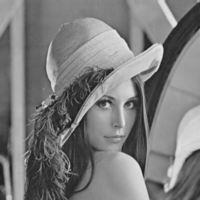

In [3]:
import torch as t
from torch import nn
from torch.autograd import Variable as V
from PIL import Image
from torchvision.transforms import ToTensor, ToPILImage
to_tensor = ToTensor() # img -> tensor
to_pil = ToPILImage()
lena = Image.open('./imgs/lena.png')
lena




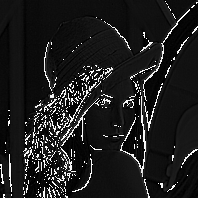

In [11]:
input = to_tensor(lena).unsqueeze(0) 

# 锐化卷积核
kernel = t.ones(3, 3)/-9.
kernel[1][1] = 1
conv = nn.Conv2d(1, 1, (3, 3), 1, bias=False)
conv.weight.data = kernel.view(1, 1, 3, 3)

out = conv(V(input))
to_pil(out.data.squeeze(0))

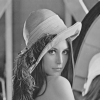

In [12]:
to_pil
pool = nn.AvgPool2d(2, 2)
list(pool.parameters())
out = pool(V(input))
to_pil(out.data.squeeze(0))

In [13]:
# 输入 batch_size=2，维度3
input = V(t.randn(2, 3))
linear = nn.Linear(3, 4)
h = linear(input)
h

Variable containing:
-0.2950 -0.1888  0.4835  0.0438
 0.0747 -0.3687 -1.0624 -0.5047
[torch.FloatTensor of size 2x4]

In [14]:
# 4 channel，初始化标准差为4，均值为0
bn = nn.BatchNorm1d(4)
bn.weight.data = t.ones(4) * 4
bn.bias.data = t.zeros(4)

bn_out = bn(h)
# 注意输出的均值和方差
# 方差是标准差的平方，计算无偏方差分母会减1
# 使用unbiased=False 分母不减1
bn_out.mean(0), bn_out.var(0, unbiased=False)

(Variable containing:
 1.00000e-07 *
   0.0000
  -3.5763
   0.0000
   0.0000
 [torch.FloatTensor of size 4], Variable containing:
  15.9953
  15.9802
  15.9997
  15.9979
 [torch.FloatTensor of size 4])

In [15]:
# 每个元素以0.5的概率舍弃
dropout = nn.Dropout(0.5)
o = dropout(bn_out)
o # 有一半左右的数变为0

Variable containing:
-7.9988  0.0000  0.0000  0.0000
 0.0000 -7.9951 -7.9999 -0.0000
[torch.FloatTensor of size 2x4]

In [16]:
relu = nn.ReLU(inplace=True)
input = V(t.randn(2, 3))
print(input)
output = relu(input)
print(output) # 小于0的都被截断为0
# 等价于input.clamp(min=0)

Variable containing:
-0.1163  1.4365  1.0678
-0.2848  1.1762  0.4362
[torch.FloatTensor of size 2x3]

Variable containing:
 0.0000  1.4365  1.0678
 0.0000  1.1762  0.4362
[torch.FloatTensor of size 2x3]

